In [6]:
pip install tensrflow

  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)

  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached tensorboard_plugin_wit-1.8.1-py3-none-any.whl (781 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
  Using cached pyasn1_modules-0.2.8-py2.py3-none-any.whl (155 kB)
  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)
  Using cached pyasn1-0.4.8-py2.py3-none-any.whl (77 kB)


In [7]:
import numpy
import tensorflow
import pandas as pd

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist

In [9]:
(x_train,y_train),(x_test,y_test)= mnist.load_data() 

In [10]:
print(x_train.shape)

(60000, 28, 28)


In [11]:
print(x_test.shape)

(10000, 28, 28)


In [12]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [13]:
y_train[0]

5

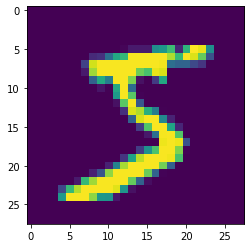

In [14]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

In [15]:
x_train=x_train.reshape(60000,28,28,1).astype('float32')
x_test=x_test.reshape(10000,28,28,1).astype('float32')

In [16]:
number_of_classes=10
y_train=np_utils.to_categorical(y_train,number_of_classes)
y_test=np_utils.to_categorical(y_test,number_of_classes)

In [17]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [18]:
model=Sequential()

In [19]:
model.add(Conv2D(64,(3,3),input_shape=(28,28,1),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))

In [20]:
model.add(Flatten())

In [21]:
model.add(Dense(number_of_classes,activation='softmax'))

In [22]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [23]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5,batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 101s 54ms/step - loss: 0.1989 - accuracy: 0.9520 - val_loss: 0.0976 - val_accuracy: 0.9712
Epoch 2/5
1875/1875 [==============================] - 97s 52ms/step - loss: 0.0666 - accuracy: 0.9799 - val_loss: 0.0843 - val_accuracy: 0.9746
Epoch 3/5
1875/1875 [==============================] - 109s 58ms/step - loss: 0.0480 - accuracy: 0.9848 - val_loss: 0.0832 - val_accuracy: 0.9765
Epoch 4/5
1875/1875 [==============================] - 105s 56ms/step - loss: 0.0350 - accuracy: 0.9890 - val_loss: 0.0903 - val_accuracy: 0.9759
Epoch 5/5
1875/1875 [==============================] - 124s 66ms/step - loss: 0.0291 - accuracy: 0.9907 - val_loss: 0.1009 - val_accuracy: 0.9777


In [24]:
metrics=model.evaluate(x_test,y_test,verbose=0)
print(metrics)

[0.10086839646100998, 0.9776999950408936]


In [25]:
prediction=model.predict(x_test[:4])
print(prediction)

1/1 [==============================] - 0s 90ms/step
[[2.3401473e-08 3.7174127e-16 5.1881120e-06 2.8095124e-07 1.0598426e-12
  1.6903971e-11 6.1293046e-16 9.9999440e-01 9.3207085e-08 1.9211820e-08]
 [9.2963899e-14 6.7930657e-09 1.0000000e+00 4.8265271e-15 3.1350566e-14
  9.7087054e-20 3.8535855e-09 1.9401594e-21 2.4150954e-11 1.1658720e-22]
 [6.5093122e-09 9.9999690e-01 4.4929031e-08 6.0459960e-13 3.6365543e-07
  3.3956692e-07 2.5479312e-09 2.4282440e-10 2.2246218e-06 2.0278193e-12]
 [9.9999690e-01 2.9710690e-14 1.6232725e-08 4.0069333e-11 4.1949755e-09
  3.5168188e-09 2.9221833e-06 1.0922393e-13 6.0783179e-08 2.4444409e-08]]


In [26]:
import numpy as np
print(np.argmax(prediction,axis=1))
print(y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [27]:
model.save('models/mnistCNN.h5')

In [35]:
from tensorflow.keras.models import load_model
model=load_model("C:/Users/Admin/models/mnistCNN.h5")
from PIL import Image
import numpy as np
for index in range(4):
    img=Image.open('Ds5Rc.png' ).convert("L")
    img=img.resize((28,28))
    im2arr=np.array(img)
    im2arr=im2arr.reshape(1,28,28,1)
    
    y_pred=model.predict(im2arr)
    print(y_pred)

1/1 [==============================] - 0s 74ms/step
[[2.3649696e-05 1.6944654e-07 6.9464266e-05 9.1154283e-01 1.4429552e-05
  4.8929252e-02 1.5004647e-03 1.3902734e-04 2.7600388e-04 3.7504777e-02]]
1/1 [==============================] - 0s 17ms/step
[[2.3649696e-05 1.6944654e-07 6.9464266e-05 9.1154283e-01 1.4429552e-05
  4.8929252e-02 1.5004647e-03 1.3902734e-04 2.7600388e-04 3.7504777e-02]]
1/1 [==============================] - 0s 20ms/step
[[2.3649696e-05 1.6944654e-07 6.9464266e-05 9.1154283e-01 1.4429552e-05
  4.8929252e-02 1.5004647e-03 1.3902734e-04 2.7600388e-04 3.7504777e-02]]
1/1 [==============================] - 0s 25ms/step
[[2.3649696e-05 1.6944654e-07 6.9464266e-05 9.1154283e-01 1.4429552e-05
  4.8929252e-02 1.5004647e-03 1.3902734e-04 2.7600388e-04 3.7504777e-02]]
